In [1]:
import numpy as np
from wgpu.gui.auto import WgpuCanvas
import pygfx as gfx
from fastplotlib import GridPlot, Scatter
from sklearn import datasets
from sklearn.decomposition import PCA

In [2]:
iris = datasets.load_iris()
data = iris['data']
colors = iris['target']

In [3]:
pca = PCA(n_components=3)
X_ = pca.fit_transform(data)

RFBOutputContext()


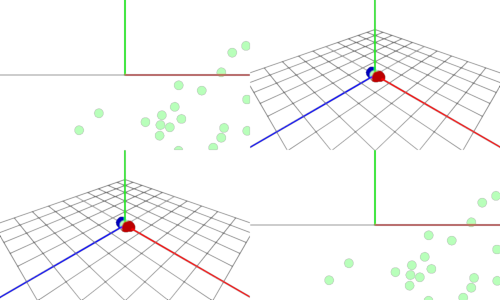

JupyterWgpuCanvas()

In [4]:
canvas = WgpuCanvas()
renderer = gfx.renderers.WgpuRenderer(canvas)

grid_plot = GridPlot(
    canvas=canvas,
    renderer=renderer,
    grid_shape=(2, 2),
    cameras=np.array([['o', 'p'], ['p', 'o']]),
    controllers=np.array([[0, 1,], [1, 2]])
)

for subplot in grid_plot:
    scatter = Scatter(data=X_, colors=colors)
    subplot.add_graphic(scatter)
    
    subplot.set_axes_visibility(True)
    subplot.set_grid_visibility(True)
    
canvas.request_draw(grid_plot.animate)
canvas